In [1]:
# https://www.kaggle.com/code/fareselmenshawii/cats-vs-dogs-classification/notebook
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp
from scipy import ndimage
from shutil import copyfile
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
def make_directories():
  try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/validation')
    os.mkdir('/tmp/cats-v-dogs/test')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/validation/cats')
    os.mkdir('/tmp/cats-v-dogs/validation/dogs')
    os.mkdir('/tmp/cats-v-dogs/test/cats')
    os.mkdir('/tmp/cats-v-dogs/test/dogs')
  except OSError:
      print('Error failed to make directory')
# make_directories()

11250
11250
625
625
625
625


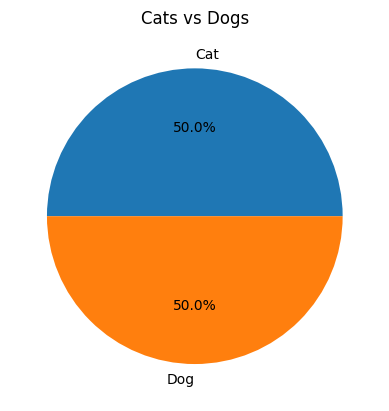

In [5]:
CAT_DIR = '../PetImages/Cat'
DOG_DIR = '../PetImages/Dog'

def print_data():
    class_names = ['Cat', 'Dog'] 
    n_dogs = len(os.listdir(CAT_DIR))
    n_cats = len(os.listdir(DOG_DIR))
    n_images = [n_cats, n_dogs]
    fig, ax = plt.subplots()
    ax.pie(n_images, labels=class_names, autopct='%1.1f%%')
    ax.set_title('Cats vs Dogs')
    # plt.show()

print_data()
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS = os.path.join(VALIDATION_DIR, "dogs/")
INCLUDE_TEST = True

def view_directories():
  print(len(os.listdir('/tmp/cats-v-dogs/training/cats')))
  print(len(os.listdir('/tmp/cats-v-dogs/training/dogs')))

  print(len(os.listdir('/tmp/cats-v-dogs/validation/cats')))
  print(len(os.listdir('/tmp/cats-v-dogs/validation/dogs')))

  print(len(os.listdir('/tmp/cats-v-dogs/test/cats')))
  print(len(os.listdir('/tmp/cats-v-dogs/test/dogs')))


view_directories()

In [ ]:

def split_data(main_dir, training_dir, validation_dir, test_dir=None, include_test_split = True,  split_size=0.9):
    """
    Splits the data into train validation and test sets (optional)

    Args:
    main_dir (string):  path containing the images
    training_dir (string):  path to be used for training
    validation_dir (string):  path to be used for validation
    test_dir (string):  path to be used for test
    include_test_split (boolen):  whether to include a test split or not
    split_size (float): size of the dataset to be used for training
    """
    files = []
    for file in os.listdir(main_dir):
        if  os.path.getsize(os.path.join(main_dir, file)): # check if the file's size isn't 0
            files.append(file) # appends file name to a list

    shuffled_files = random.sample(files,  len(files)) # shuffles the data
    split = int(0.9 * len(shuffled_files)) #the training split casted into int for numeric rounding
    train = shuffled_files[:split] #training split
    split_valid_test = int(split + (len(shuffled_files)-split)/2)
   
    if include_test_split:
        validation = shuffled_files[split:split_valid_test] # validation split
        test = shuffled_files[split_valid_test:]
    else:
        validation = shuffled_files[split:]

    for element in train:
        copyfile(os.path.join(main_dir,  element), os.path.join(training_dir, element)) # copy files into training directory

    for element in validation:
        copyfile(os.path.join(main_dir,  element), os.path.join(validation_dir, element))# copy files into validation directory
        
    if include_test_split:
        for element in test:
            copyfile(os.path.join(main_dir,  element), os.path.join(test_dir, element)) # copy files into test directory
    print("Split sucessful!")
# split_data(CAT_DIR, '/tmp/cats-v-dogs/training/cats', '/tmp/cats-v-dogs/validation/cats', '/tmp/cats-v-dogs/test/cats',INCLUDE_TEST, 0.9)
# split_data(DOG_DIR, '/tmp/cats-v-dogs/training/dogs', '/tmp/cats-v-dogs/validation/dogs','/tmp/cats-v-dogs/test/dogs',INCLUDE_TEST, 0.9)

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

validation_gen =  ImageDataGenerator(rescale=1./255.)

if INCLUDE_TEST:
    test_gen =  ImageDataGenerator(rescale=1./255.)

train_generator = train_gen.flow_from_directory(
        '/tmp/cats-v-dogs/training',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')
validation_generator = validation_gen.flow_from_directory(
        '/tmp/cats-v-dogs/validation',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

if INCLUDE_TEST:
    test_generator = test_gen.flow_from_directory(
        '/tmp/cats-v-dogs/validation',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 22499 images belonging to 2 classes.
Found 1249 images belonging to 2 classes.
Found 1249 images belonging to 2 classes.


/Users/future/Documents/Work/Handwritten-Digit-Recognition-using-Deep-Learning/venv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


KeyboardInterrupt: 

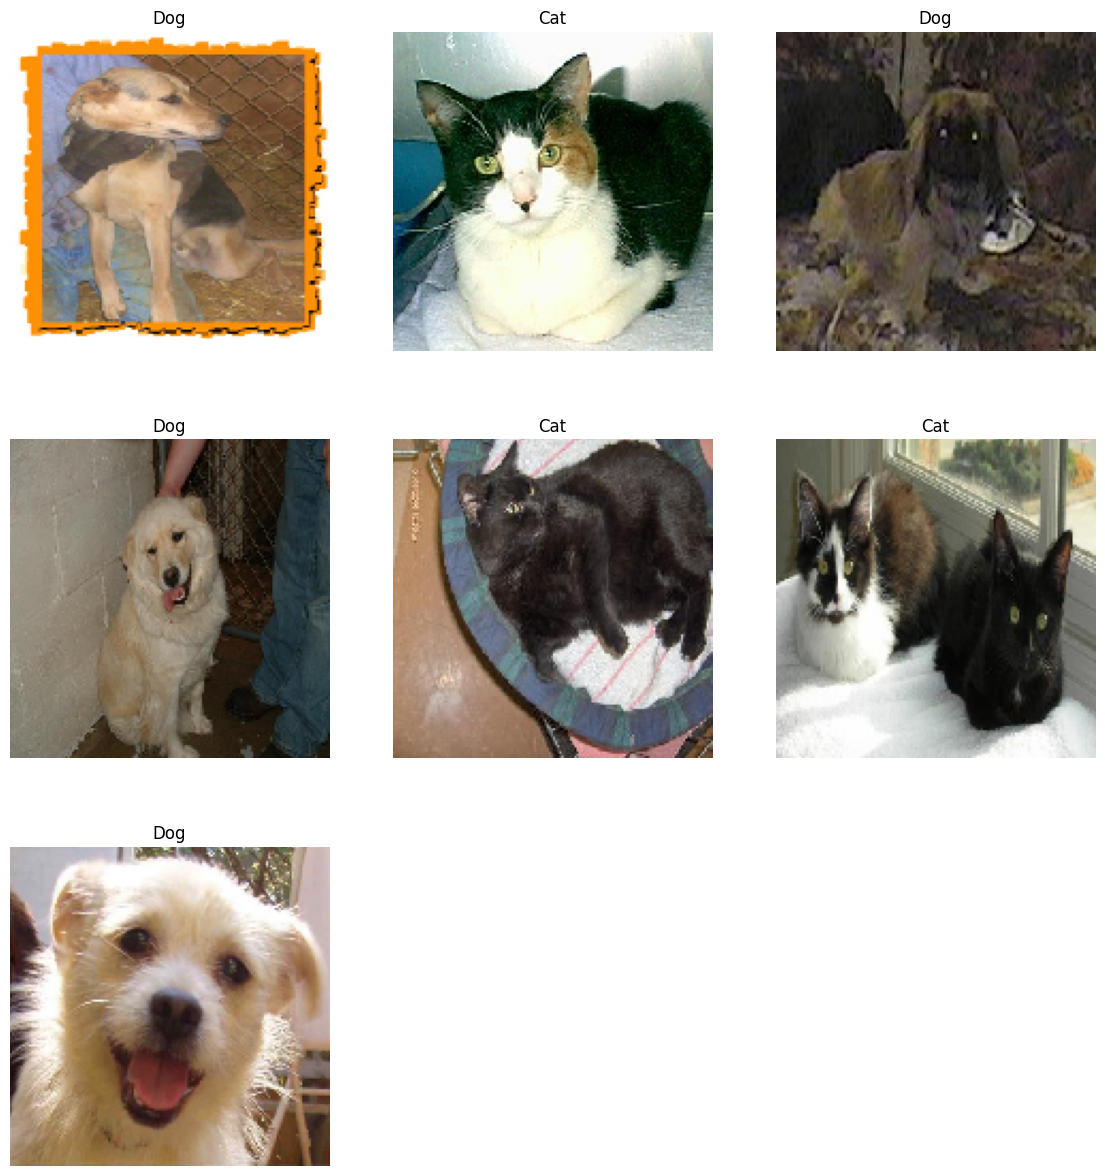

In [7]:
class_names = ['Cat', 'Dog']

def plot_data(generator, n_images):
    plt.figure(figsize=(14, 15))
    i = 1
    for batch in generator:
        images, labels = batch
        labels = labels.astype('int32')

        for image, label in zip(images, labels):
            if i > n_images:
                break
            plt.subplot((n_images // 3) + 1, 3, i)
            plt.imshow(image)
            plt.title(class_names[label])
            plt.axis('off')
            i += 1
    plt.show()
plot_data(train_generator,7)